In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.stats.api as sm
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from nltk.corpus import stopwords
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
import xgboost 
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# importing historcal stock data
ds= pd.read_csv("BSESN.csv")

In [3]:
ds.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
5,2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0
6,2001-01-10,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,0.0
7,2001-01-11,4066.129883,4077.540039,4006.540039,4027.129883,4027.129883,0.0
8,2001-01-12,4059.409912,4082.770020,4018.280029,4036.580078,4036.580078,0.0
9,2001-01-15,4074.320068,4080.139893,4018.239990,4046.760010,4046.760010,0.0


In [4]:
ds.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4863,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0
4864,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
4865,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
4866,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
4867,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [5]:
ds.isnull().sum()

Date          0
Open         74
High         74
Low          74
Close        74
Adj Close    74
Volume       74
dtype: int64

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 7 columns):
Date         4868 non-null object
Open         4794 non-null float64
High         4794 non-null float64
Low          4794 non-null float64
Close        4794 non-null float64
Adj Close    4794 non-null float64
Volume       4794 non-null float64
dtypes: float64(6), object(1)
memory usage: 266.3+ KB


In [7]:
#First removing the holidays from the stock data using holidays package so that the NAN values for those days can be dropped, 
#as the market is not open on those days.

In [8]:
from datetime import date
import holidays

In [9]:
ind_holidays = holidays.India()

In [10]:
ind_holidays

{}

In [11]:
holid=[]
for hol in holidays.India(years = [2001,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]).items():
    holid.append(hol)

In [12]:
holid = pd.DataFrame(holid)

In [13]:
holid.head()

,0,1
0,2001-01-14,Makar Sankranti / Pongal
1,2001-01-26,Republic Day
2,2001-08-15,Independence Day
3,2001-10-02,Gandhi Jayanti
4,2001-05-01,Labour Day


In [14]:
holid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
0    114 non-null object
1    114 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


In [15]:
holid=[]
for hol in holidays.India(years = [2001,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]).items():
    holid.append(str(hol[0]))

In [16]:
print(holid,end=',')

['2001-01-14', '2001-01-26', '2001-08-15', '2001-10-02', '2001-05-01', '2001-12-25', '2002-01-14', '2002-01-26', '2002-08-15', '2002-10-02', '2002-05-01', '2002-12-25', '2004-01-14', '2004-01-26', '2004-08-15', '2004-10-02', '2004-05-01', '2004-12-25', '2005-01-14', '2005-01-26', '2005-08-15', '2005-10-02', '2005-05-01', '2005-12-25', '2006-01-14', '2006-01-26', '2006-08-15', '2006-10-02', '2006-05-01', '2006-12-25', '2007-01-14', '2007-01-26', '2007-08-15', '2007-10-02', '2007-05-01', '2007-12-25', '2008-01-14', '2008-01-26', '2008-08-15', '2008-10-02', '2008-05-01', '2008-12-25', '2009-01-14', '2009-01-26', '2009-08-15', '2009-10-02', '2009-05-01', '2009-12-25', '2010-01-14', '2010-01-26', '2010-08-15', '2010-10-02', '2010-05-01', '2010-12-25', '2011-01-14', '2011-01-26', '2011-08-15', '2011-10-02', '2011-05-01', '2011-12-25', '2012-01-14', '2012-01-26', '2012-08-15', '2012-10-02', '2012-05-01', '2012-12-25', '2013-01-14', '2013-01-26', '2013-08-15', '2013-10-02', '2013-05-01', '2013

In [17]:
ds2= ds.copy()

In [18]:
ds2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [19]:
str(ds2['Date'][0])

'2001-01-02'

In [20]:
#using list comprehension

print([1 if str(val).split()[0] in holid else 0 for val in ds2['Date']],end=',')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [21]:
ds2['is_holiday']= [1 if str(val).split()[0] in holid else 0 for val in ds2['Date']]

In [22]:
ds2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,is_holiday
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,0


In [23]:
ds2[ds2['is_holiday']==1]

,Date,Open,High,Low,Close,Adj Close,Volume,is_holiday
18,2001-01-26,NaN,NaN,NaN,NaN,NaN,NaN,1
85,2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN,1
161,2001-08-15,NaN,NaN,NaN,NaN,NaN,NaN,1
195,2001-10-02,NaN,NaN,NaN,NaN,NaN,NaN,1
255,2001-12-25,NaN,NaN,NaN,NaN,NaN,NaN,1
269,2002-01-14,3373.689941,3446.919922,3373.689941,3407.840088,3407.840088,0.0,1
346,2002-05-01,NaN,NaN,NaN,NaN,NaN,NaN,1
422,2002-08-15,NaN,NaN,NaN,NaN,NaN,NaN,1
456,2002-10-02,NaN,NaN,NaN,NaN,NaN,NaN,1
516,2002-12-25,NaN,NaN,NaN,NaN,NaN,NaN,1


#### 14th Jan is listed as public holiday but on the working days i.e, between Monday to Friday if 14th Jan falls then the market is open.
#### Thus we have to remove these from the list orelse it will lead to manipulating data incorrectly as we have the data for those.

In [24]:
#Working again using the Holid and after dropping non-holidays adding it to ds2

In [25]:
holid=[]
for hol in holidays.India(years = [2001,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]).items():
    holid.append(str(hol[0]))

In [26]:
print(holid,end=',')

['2001-01-14', '2001-01-26', '2001-08-15', '2001-10-02', '2001-05-01', '2001-12-25', '2002-01-14', '2002-01-26', '2002-08-15', '2002-10-02', '2002-05-01', '2002-12-25', '2004-01-14', '2004-01-26', '2004-08-15', '2004-10-02', '2004-05-01', '2004-12-25', '2005-01-14', '2005-01-26', '2005-08-15', '2005-10-02', '2005-05-01', '2005-12-25', '2006-01-14', '2006-01-26', '2006-08-15', '2006-10-02', '2006-05-01', '2006-12-25', '2007-01-14', '2007-01-26', '2007-08-15', '2007-10-02', '2007-05-01', '2007-12-25', '2008-01-14', '2008-01-26', '2008-08-15', '2008-10-02', '2008-05-01', '2008-12-25', '2009-01-14', '2009-01-26', '2009-08-15', '2009-10-02', '2009-05-01', '2009-12-25', '2010-01-14', '2010-01-26', '2010-08-15', '2010-10-02', '2010-05-01', '2010-12-25', '2011-01-14', '2011-01-26', '2011-08-15', '2011-10-02', '2011-05-01', '2011-12-25', '2012-01-14', '2012-01-26', '2012-08-15', '2012-10-02', '2012-05-01', '2012-12-25', '2013-01-14', '2013-01-26', '2013-08-15', '2013-10-02', '2013-05-01', '2013

In [27]:
type(holid)

list

In [28]:
#removing the dates which are listed as holidays but the stock market was open on those days and data is present
holid.remove('2002-01-14')
holid.remove('2004-01-14')
holid.remove('2005-01-14')
holid.remove('2008-01-14')
holid.remove('2009-01-14')
holid.remove('2010-01-14')
holid.remove('2011-01-14')
holid.remove('2013-01-14')
holid.remove('2014-01-14')
holid.remove('2015-01-14')
holid.remove('2016-01-14')
holid.remove('2019-01-14')
holid.remove('2020-01-14')

In [29]:
ds2= ds

In [30]:
ds2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [31]:
ds2['is_holiday']= [1 if str(val).split()[0] in holid else 0 for val in ds2['Date']]

In [32]:
ds2[ds2['is_holiday']==1]

,Date,Open,High,Low,Close,Adj Close,Volume,is_holiday
18,2001-01-26,NaN,NaN,NaN,NaN,NaN,NaN,1
85,2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN,1
161,2001-08-15,NaN,NaN,NaN,NaN,NaN,NaN,1
195,2001-10-02,NaN,NaN,NaN,NaN,NaN,NaN,1
255,2001-12-25,NaN,NaN,NaN,NaN,NaN,NaN,1
346,2002-05-01,NaN,NaN,NaN,NaN,NaN,NaN,1
422,2002-08-15,NaN,NaN,NaN,NaN,NaN,NaN,1
456,2002-10-02,NaN,NaN,NaN,NaN,NaN,NaN,1
516,2002-12-25,NaN,NaN,NaN,NaN,NaN,NaN,1
799,2004-01-26,NaN,NaN,NaN,NaN,NaN,NaN,1


##### Now finally we have null values corresponding to the holidays due to which data is not present. Thus we can drop these null values

In [33]:
index_names = ds2[ ds2['is_holiday'] == 1 ].index 

In [34]:
index_names

Int64Index([18, 85, 161, 195, 255, 346, 422, 456, 516, 799], dtype='int64')

In [35]:
ds2.drop([18,85,161,195, 255, 346, 422, 456, 516, 799],inplace=True)

In [36]:
ds2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,is_holiday
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,0


In [37]:
ds2[ds2['is_holiday']==1]

,Date,Open,High,Low,Close,Adj Close,Volume,is_holiday


#### Thus all the null values due to holidays have been dropped.

In [38]:
ds2.isnull().sum()

Date           0
Open          64
High          64
Low           64
Close         64
Adj Close     64
Volume        64
is_holiday     0
dtype: int64

In [39]:
#For the remaining missing values first removing the weekend dates if any

In [40]:
ds2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,is_holiday
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,0


In [41]:
ds2['Date']=pd.to_datetime(ds2.Date,format='%Y-%m-%d')

In [42]:
ds2= ds2[~ds2.Date.dt.weekday_name.isin(['Saturday','Sunday'])]


In [43]:
#The code above converts the date column to a datetime dtype. 
#Then it returns a dataframe with all days not in you exclusion list.

In [44]:
ds2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,is_holiday
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,0


In [45]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 4867
Data columns (total 8 columns):
Date          4850 non-null datetime64[ns]
Open          4794 non-null float64
High          4794 non-null float64
Low           4794 non-null float64
Close         4794 non-null float64
Adj Close     4794 non-null float64
Volume        4794 non-null float64
is_holiday    4850 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 341.0 KB


In [46]:
ds2.isnull().sum()

Date           0
Open          56
High          56
Low           56
Close         56
Adj Close     56
Volume        56
is_holiday     0
dtype: int64

#### Now as we have removed the null values resulting from the weekends and festive holidays, remaining null values have very high probability that the market was open during those days but due to some reason data was not reported.

In [47]:
# For the remaining missing values we can use ffill() for the data, as the missing values are low , using ffill() won't affect
#the time series variation that much.

In [48]:
#dropping is_holiday column

In [49]:
ds2 = ds2.drop('is_holiday',axis=1)

In [50]:
ds2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [51]:
ds2= ds2.ffill(axis=0)

In [52]:
ds2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [53]:
## All the missing values have been taken care of.

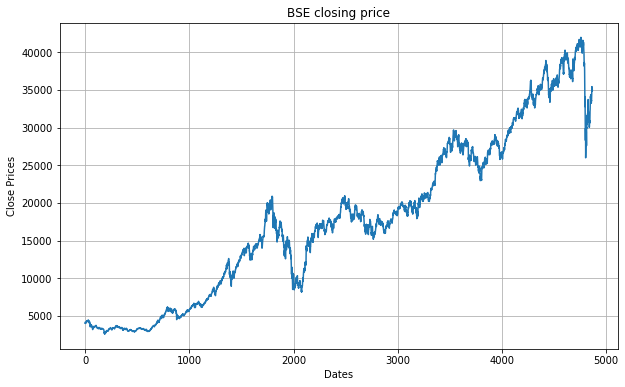

In [54]:
#Data Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(ds2['Close'])
plt.title('BSE closing price')
plt.show()

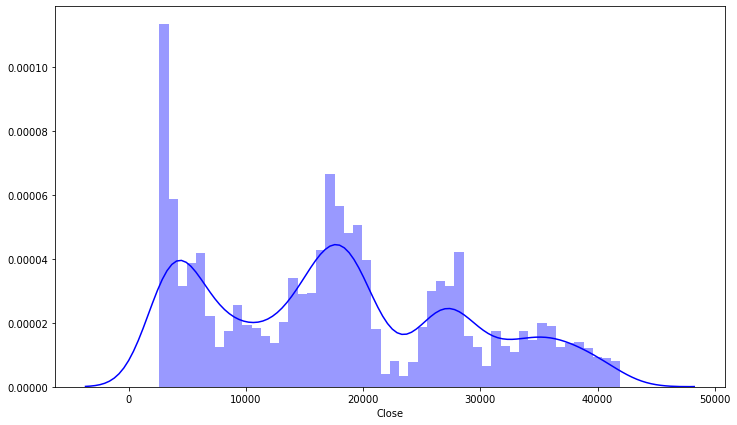

In [55]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.distplot(ds2['Close'], bins=50, color='blue')

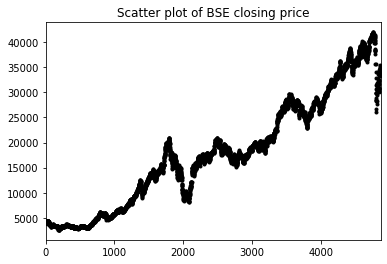

In [56]:
ds2_close = ds2['Close']
ds2_close.plot(style='k.')
plt.title('Scatter plot of BSE closing price')
plt.show()

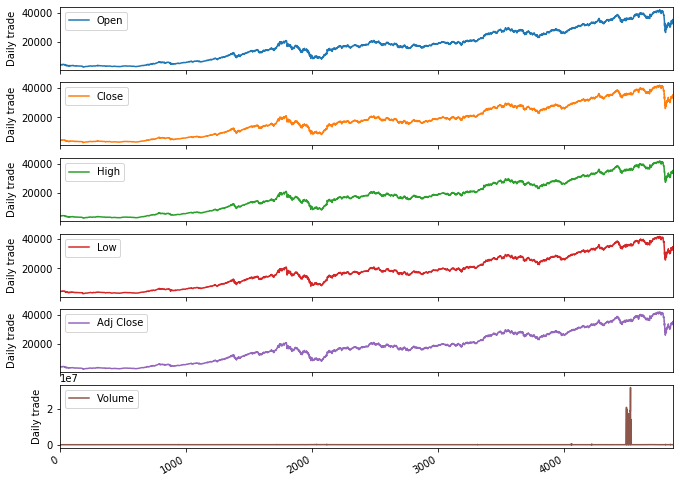

In [57]:
cols_plot = ['Open', 'Close', 'High','Low','Adj Close','Volume']
axes = ds2[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

### Feature Engineering

Almost every time series problem will have some external features or some internal feature engineering to help the model.

Let's add some basic features like lag values of available numeric features that are widely used for time series problems. Since we need to predict the price of the SENSEX(BSE) for a day, we cannot use the feature values of the same day since they will be unavailable at actual inference time. We need to use statistics like mean, standard deviation of their lagged values.

#### We will use three sets of lagged values, one previous day, one looking back 7 days and another looking back 30 days as a proxy for last week and last month metrics.

In [58]:
ds2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [59]:
d=ds2

In [60]:
lag_features = ["High", "Low", "Volume", "Open"]

In [61]:
window1 = 3
window2 = 7
window3 = 30

In [62]:
d_rolled_3d = d[lag_features].rolling(window=window1, min_periods=0)
d_rolled_7d = d[lag_features].rolling(window=window2, min_periods=0)
d_rolled_30d = d[lag_features].rolling(window=window3, min_periods=0)

d_mean_3d = d_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
d_mean_7d = d_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
d_mean_30d = d_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

d_std_3d = d_rolled_3d.std().shift(1).reset_index().astype(np.float32)
d_std_7d = d_rolled_7d.std().shift(1).reset_index().astype(np.float32)
d_std_30d = d_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    d[f"{feature}_mean_lag{window1}"] = d_mean_3d[feature]
    d[f"{feature}_mean_lag{window2}"] = d_mean_7d[feature]
    d[f"{feature}_mean_lag{window3}"] = d_mean_30d[feature]
    
    d[f"{feature}_std_lag{window1}"] = d_std_3d[feature]
    d[f"{feature}_std_lag{window2}"] = d_std_7d[feature]
    d[f"{feature}_std_lag{window3}"] = d_std_30d[feature]

d.fillna(d.mean(), inplace=True)

d.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_mean_lag3,High_mean_lag7,High_mean_lag30,...,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,18059.093750,18046.248047,17975.277344,...,83076.171875,53262.171875,68400.03125,110720.75,17950.033203,17937.328125,17867.230469,146.423538,220.348969,447.793335
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,4028.570068,4028.570068,4028.570068,...,0.000000,53262.171875,68400.03125,110720.75,3953.219971,3953.219971,3953.219971,146.423538,220.348969,447.793335
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,4048.114990,4048.114990,4048.114990,...,0.000000,0.000000,0.00000,0.00,3965.400146,3965.400146,3965.400146,17.225197,17.225197,17.225197
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,4092.400146,4092.400146,4092.400146,...,0.000000,0.000000,0.00000,0.00,4037.256836,4037.256836,4037.256836,125.054077,125.054077,125.054077
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,4147.879883,4118.052734,4118.052734,...,0.000000,0.000000,0.00000,0.00,4091.630127,4057.027588,4057.027588,103.922173,109.495277,109.495277


In [63]:
d.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,High_mean_lag3,High_mean_lag7,High_mean_lag30,...,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30
4863,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0,18059.09375,18046.248047,17975.277344,...,83076.171875,53262.171875,68400.03125,110720.75,17950.033203,17937.328125,17867.230469,146.423538,220.348969,447.793335
4864,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,18059.09375,18046.248047,17975.277344,...,83076.171875,53262.171875,68400.03125,110720.75,17950.033203,17937.328125,17867.230469,146.423538,220.348969,447.793335
4865,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,18059.09375,18046.248047,17975.277344,...,83076.171875,53262.171875,68400.03125,110720.75,17950.033203,17937.328125,17867.230469,146.423538,220.348969,447.793335
4866,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,18059.09375,18046.248047,17975.277344,...,83076.171875,53262.171875,68400.03125,110720.75,17950.033203,17937.328125,17867.230469,146.423538,220.348969,447.793335
4867,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,18059.09375,18046.248047,17975.277344,...,83076.171875,53262.171875,68400.03125,110720.75,17950.033203,17937.328125,17867.230469,146.423538,220.348969,447.793335


### ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:


Null Hypothesis: The series has a unit root (value of a =1)


Alternate Hypothesis: The series has no unit root.


If we fail to reject the null hypothesis, we can say that the series is non-stationary. 

This means that the series can be linear or difference stationary.
If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

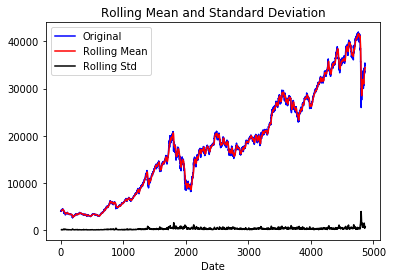

Results of dickey fuller test
Test Statistics                  -0.588652
p-value                           0.873526
No. of lags used                 28.000000
Number of observations used    4821.000000
critical value (1%)              -3.431707
critical value (5%)              -2.862140
critical value (10%)             -2.567089
dtype: float64


In [64]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(d['Close'])

p-value is close to 1 and thus we cannot reject the null hypothesis.

<Figure size 432x288 with 0 Axes>

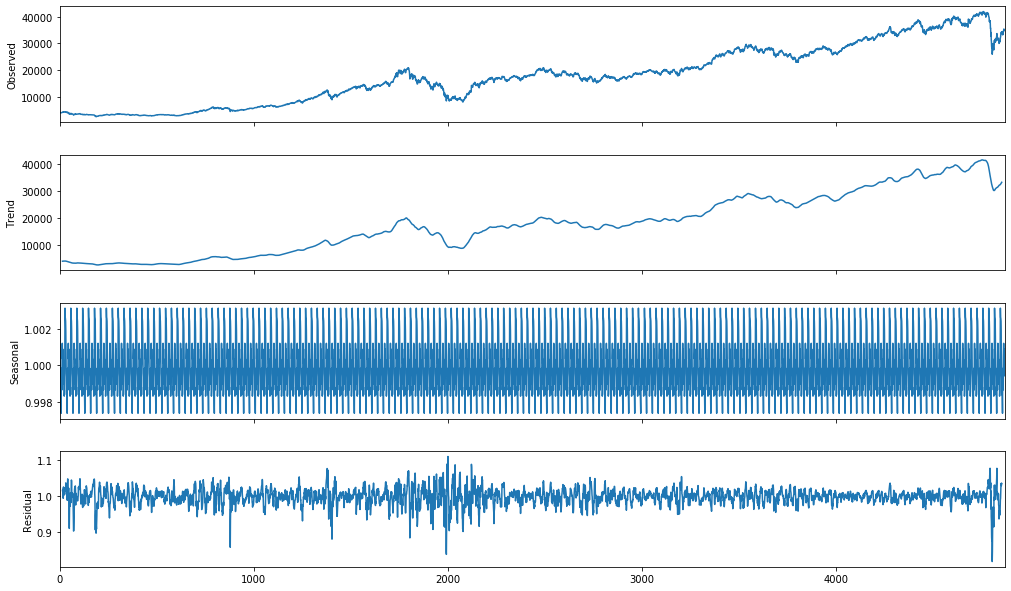

In [65]:
result = seasonal_decompose(d['Close'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


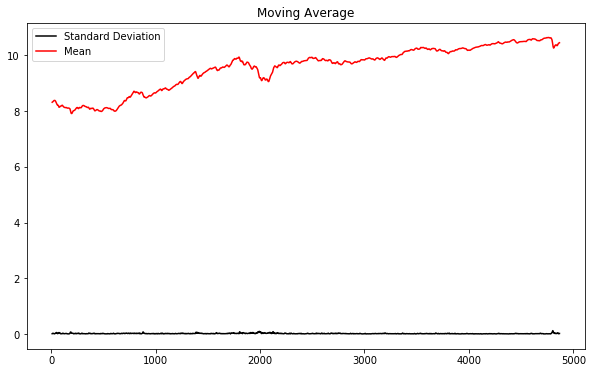

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(d['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

#### Splitting the data into train and validation along with features.

 train: Data from 1st Jan 2001 to 31st December, 2019.
 
 test: Data from 1st January, 2020 to 29th June, 2020.

In [67]:
d_train = d[d.Date < "2019"]
d_test = d[d.Date >= "2019"]

##### The additional features supplied to time series problems are called exogenous regressors.

In [68]:
exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30",]

In [69]:
model = auto_arima(d_train.Close, exogenous=d_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(d_train.Close, exogenous=d_train[exogenous_features])

forecast_arima = model.predict(n_periods=len(d_test), exogenous=d_test[exogenous_features])
d_test["Forecast_ARIMAX"]= forecast_arima

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=65158.953, Time=39.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=66665.152, Time=17.65 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64212.013, Time=24.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=67826.353, Time=24.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=99909.245, Time=6.39 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=65132.196, Time=23.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=65166.489, Time=32.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=65150.360, Time=33.62 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=64212.130, Time=26.75 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 229.197 seconds


The best ARIMA model is ARIMA(1, 0,0) which has the lowest AIC.

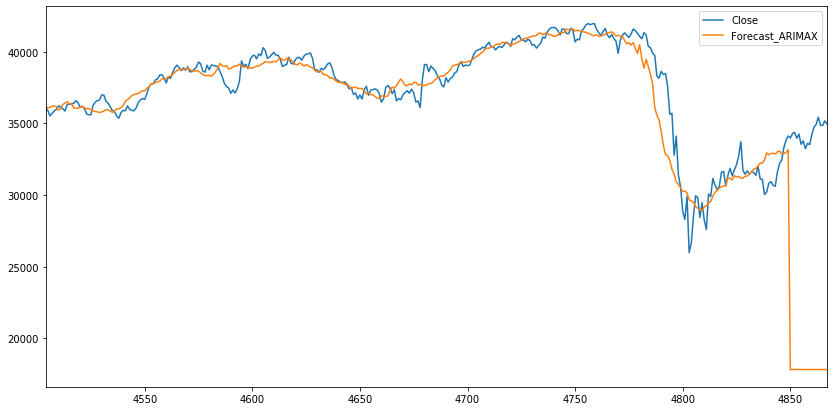

In [70]:
d_test[["Close", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

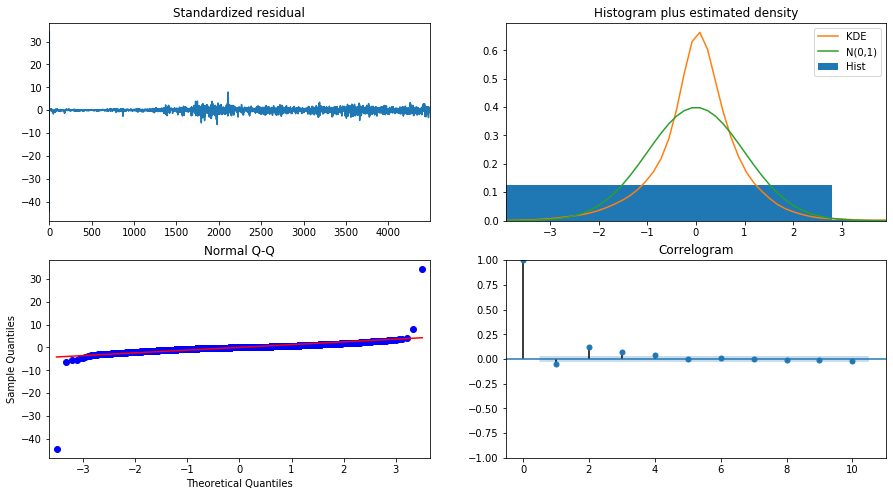

In [71]:
model.plot_diagnostics(figsize=(15,8))
plt.show()

In [72]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(d_test.Close, d_test.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(d_test.Close, d_test.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 3808.6273302629334

MAE of Auto ARIMAX: 1453.5179686884135


## Facebook Prophet

In [73]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [74]:
model_fbp = Prophet(daily_seasonality=True)
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(d_train[["Date", "Close"] + exogenous_features].rename(columns={"Date": "ds", "Close": "y"}))

forecast_fb = model_fbp.predict(d_test[["Date", "Close"] + exogenous_features].rename(columns={"Date": "ds"}))
d_test["Forecast_Prophet"] = forecast_fb.yhat.values

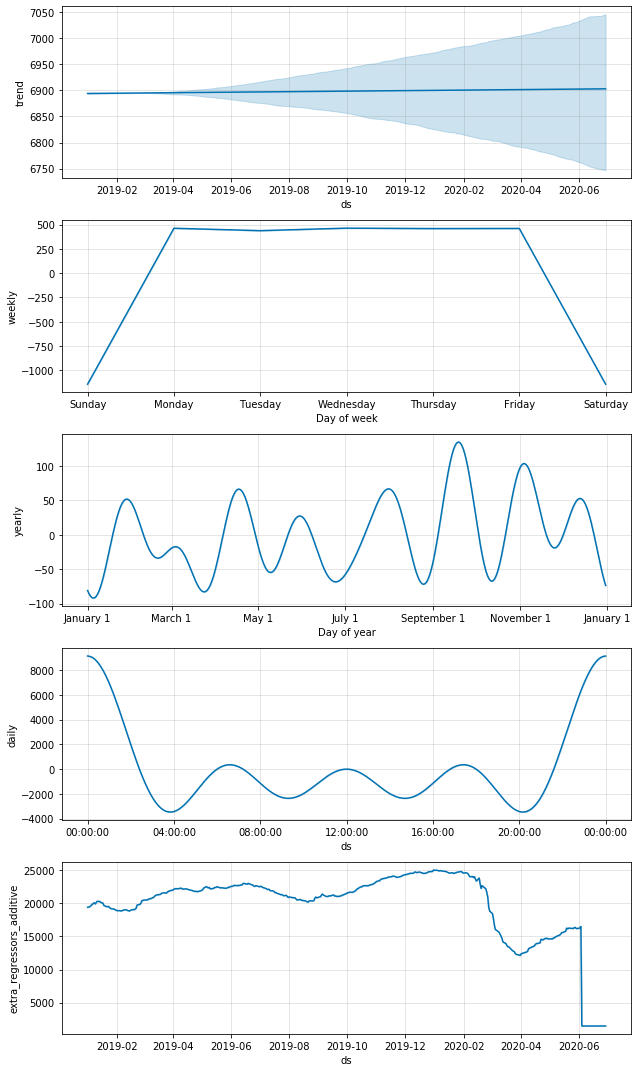

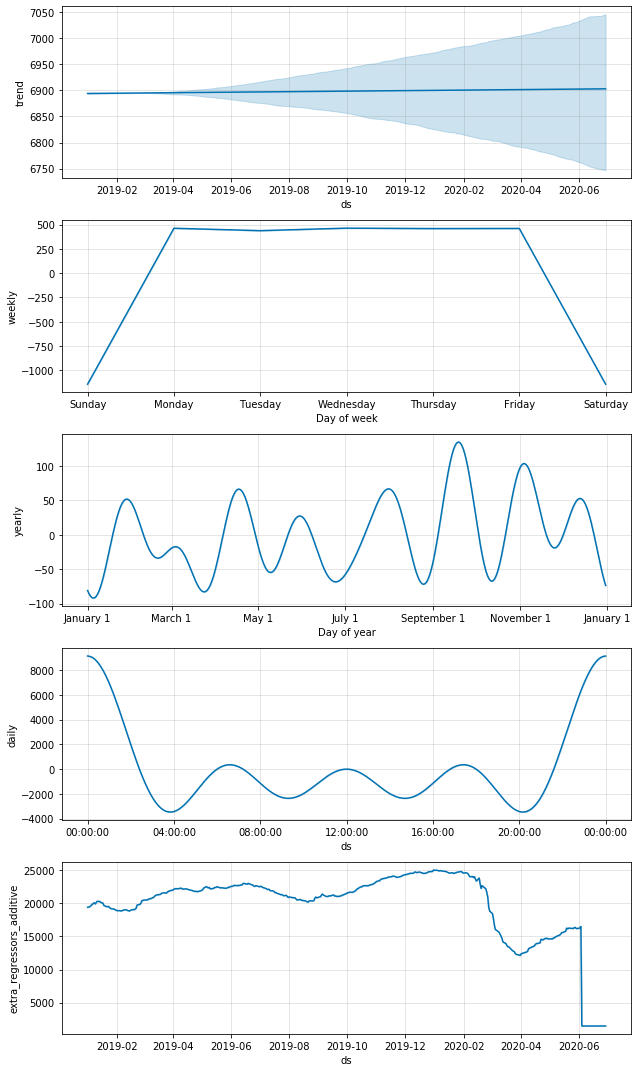

In [75]:
model_fbp.plot_components(forecast_fb)

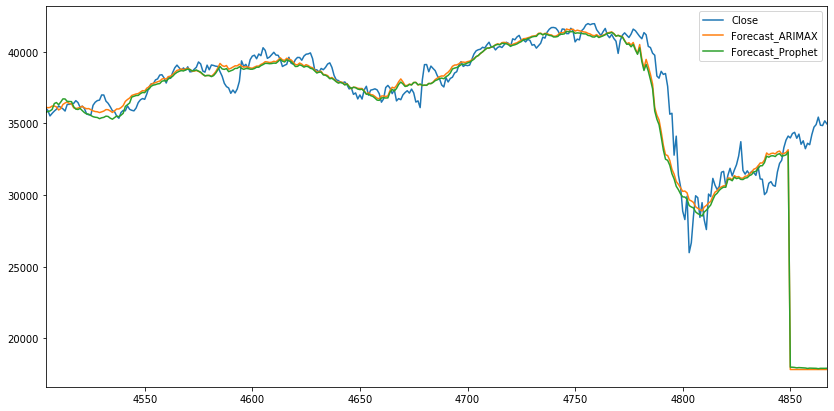

In [76]:
d_test[["Close", "Forecast_ARIMAX", "Forecast_Prophet"]].plot(figsize=(14, 7))


In [77]:
print("RMSE of Prophet:", np.sqrt(mean_squared_error(d_test.Close, d_test.Forecast_Prophet)))
print("MAE of Prophet:", mean_absolute_error(d_test.Close, d_test.Forecast_Prophet))

RMSE of Prophet: 3796.8338039567957
MAE of Prophet: 1471.5495940647463


#### NEWS Analysis

In [128]:
df= pd.read_csv("india-news-headlines.csv")

In [129]:
df.tail(5)

,publish_date,headline_category,headline_text
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [130]:
df.head(5)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [131]:
df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [132]:
#Converting data type of Date column 
df['publish_date'] = pd.to_datetime(df['publish_date'],format= '%Y%m%d')
df.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
publish_date         datetime64[ns]
headline_category    object
headline_text        object
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [134]:
df = df.drop_duplicates()

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275587 entries, 0 to 3297171
Data columns (total 3 columns):
publish_date         datetime64[ns]
headline_category    object
headline_text        object
dtypes: datetime64[ns](1), object(2)
memory usage: 100.0+ MB


In [136]:
df['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [137]:
df['headline_category'].value_counts()

india                                                       285023
unknown                                                     201268
city.mumbai                                                 131950
city.delhi                                                  124205
business.india-business                                     114570
city.chandigarh                                             107136
city.hyderabad                                               98723
city.bengaluru                                               91475
entertainment.hindi.bollywood                                90118
city.ahmedabad                                               85424
city.pune                                                    84359
city.lucknow                                                 83284
city.kolkata                                                 80884
city.nagpur                                                  76914
city.goa                                                     7

In [138]:
df['headline_text'].value_counts()

Sunny Leone HOT photos                                                          98
Football: Italian Serie A table                                                 87
Football: Spanish La Liga table                                                 84
Intraday targets/key levels                                                     81
Football: French Ligue 1 table                                                  73
RBI-MONEY-MARKET-OPERATION                                                      71
Column: Tongue in Check                                                         68
Your Say                                                                        64
Watch top news in one-minute                                                    63
Watch: Top news in one-minute                                                   63
Official Site                                                                   59
RBI-MONEY MARKET OPERATION                                                      59
Foot

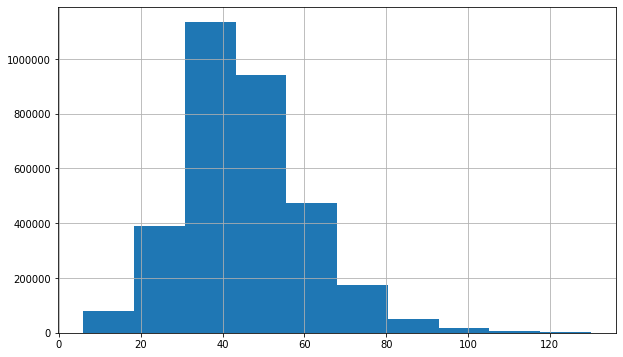

In [139]:
df['headline_text'].str.len().hist()

In [140]:
# Removing punctuations
data=df.iloc[:,0:3]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [141]:
# Convertng headlines to lower case
for index in data:
    data['headline_text']=data['headline_text'].str.lower()
data.head(1)

,publish_date,headline_category,headline_text
0,2001-01-01,sports wwe,win over cena satisfying but defeating underta...


In [143]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [144]:
### Dropping Headlines column
data.drop('headline_category', axis = 1, inplace=True)

In [145]:
data.head()

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,status quo will not be disturbed at ayodhya s...
2,2001-01-02,fissures in hurriyat over pak visit
3,2001-01-02,america s unwanted heading for india
4,2001-01-02,for bigwigs it is destination goa


In [146]:
#Adding subjectivity and polarity columns
data['Subjectivity'] = data['headline_text'].apply(getSubjectivity)
data['Polarity'] = data['headline_text'].apply(getPolarity)
data.head()

,publish_date,headline_text,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,status quo will not be disturbed at ayodhya s...,0.000000,0.000000
2,2001-01-02,fissures in hurriyat over pak visit,0.000000,0.000000
3,2001-01-02,america s unwanted heading for india,0.000000,0.000000
4,2001-01-02,for bigwigs it is destination goa,0.000000,0.000000


In [147]:
data.tail()

,publish_date,headline_text,Subjectivity,Polarity
3297167,2020-06-30,why tiktok removed crore videos in india,0.000000,0.000000
3297168,2020-06-30,apurva asrani calls alia bhatts mother soni ra...,0.000000,0.000000
3297169,2020-06-30,kangana ranaut gets a doll version of herself ...,0.454545,0.136364
3297170,2020-06-30,meezaan jaffrey reminisces his childhood days ...,1.000000,0.500000
3297171,2020-06-30,prabhas titled as radhe shyam prabhas and po...,0.416667,0.125000


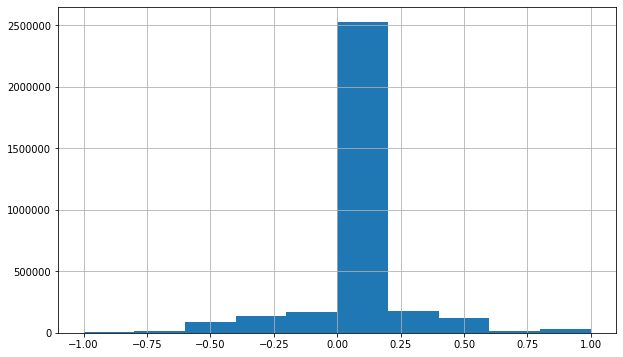

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
data['Polarity'].hist()

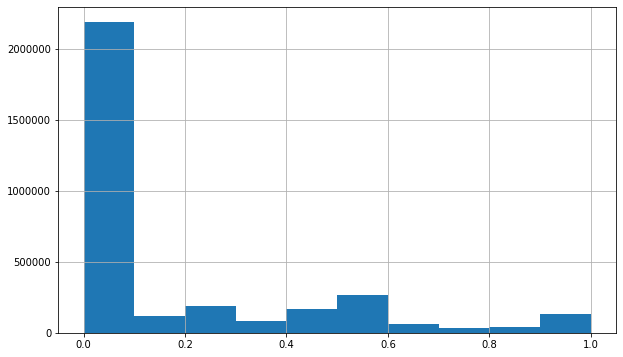

In [149]:
plt.figure(figsize = (10,6))
data['Subjectivity'].hist()

In [150]:
sia = SentimentIntensityAnalyzer()

data['Compound'] = [sia.polarity_scores(i)['compound'] for i in data['headline_text']]
data['Negative'] = [sia.polarity_scores(i)['neg'] for i in data['headline_text']]
data['Neutral'] = [sia.polarity_scores(i)['neu'] for i in data['headline_text']]
data['Positive'] = [sia.polarity_scores(i)['pos'] for i in data['headline_text']]
data.head()

,publish_date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02,status quo will not be disturbed at ayodhya s...,0.000000,0.000000,0.2924,0.000,0.805,0.195
2,2001-01-02,fissures in hurriyat over pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,2001-01-02,america s unwanted heading for india,0.000000,0.000000,-0.2263,0.322,0.678,0.000
4,2001-01-02,for bigwigs it is destination goa,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [151]:
data.tail()

,publish_date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
3297167,2020-06-30,why tiktok removed crore videos in india,0.000000,0.000000,0.0000,0.000,1.000,0.000
3297168,2020-06-30,apurva asrani calls alia bhatts mother soni ra...,0.000000,0.000000,0.0000,0.000,1.000,0.000
3297169,2020-06-30,kangana ranaut gets a doll version of herself ...,0.454545,0.136364,0.2960,0.000,0.885,0.115
3297170,2020-06-30,meezaan jaffrey reminisces his childhood days ...,1.000000,0.500000,0.4939,0.000,0.814,0.186
3297171,2020-06-30,prabhas titled as radhe shyam prabhas and po...,0.416667,0.125000,0.2960,0.082,0.769,0.148


In [152]:
#for merging changing the name of publish_date column to Date

In [153]:
data=data.rename(columns = {'publish_date':'Date'})

In [154]:
data.head()

,Date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02,status quo will not be disturbed at ayodhya s...,0.000000,0.000000,0.2924,0.000,0.805,0.195
2,2001-01-02,fissures in hurriyat over pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,2001-01-02,america s unwanted heading for india,0.000000,0.000000,-0.2263,0.322,0.678,0.000
4,2001-01-02,for bigwigs it is destination goa,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [155]:
df_merge = pd.merge(d, data, how='inner', on='Date')
df_merge.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_mean_lag3,High_mean_lag7,High_mean_lag30,...,Open_std_lag3,Open_std_lag7,Open_std_lag30,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,18059.09375,18046.248047,17975.277344,...,146.423538,220.348969,447.793335,status quo will not be disturbed at ayodhya s...,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,18059.09375,18046.248047,17975.277344,...,146.423538,220.348969,447.793335,fissures in hurriyat over pak visit,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,18059.09375,18046.248047,17975.277344,...,146.423538,220.348969,447.793335,america s unwanted heading for india,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,18059.09375,18046.248047,17975.277344,...,146.423538,220.348969,447.793335,for bigwigs it is destination goa,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,18059.09375,18046.248047,17975.277344,...,146.423538,220.348969,447.793335,extra buses to clear tourist traffic,0.241667,0.05,0.3818,0.000,0.658,0.342


In [156]:
df_new = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_new.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,4018.879883,0.000000,0.00,0.2924,0.000,0.805,0.195
1,4018.879883,0.000000,0.00,0.0000,0.000,1.000,0.000
2,4018.879883,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,4018.879883,0.000000,0.00,0.0000,0.000,1.000,0.000
4,4018.879883,0.241667,0.05,0.3818,0.000,0.658,0.342


In [157]:
df_new.tail()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
2247311,34961.519531,1.0000,0.600000,0.6486,0.000,0.765,0.235
2247312,34961.519531,0.0000,0.000000,0.0000,0.000,1.000,0.000
2247313,34961.519531,0.0000,0.000000,0.7096,0.000,0.629,0.371
2247314,34961.519531,0.5375,0.270833,0.1872,0.111,0.736,0.153
2247315,34961.519531,0.0000,0.000000,0.4019,0.000,0.722,0.278


In [158]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df_new))
new_df.columns = df_new.columns
new_df.index = df_new.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.036053,0.000000,0.500,0.650681,0.000,0.805,0.195
1,0.036053,0.000000,0.500,0.499897,0.000,1.000,0.000
2,0.036053,0.000000,0.500,0.383199,0.322,0.678,0.000
3,0.036053,0.000000,0.500,0.499897,0.000,1.000,0.000
4,0.036053,0.241667,0.525,0.696782,0.000,0.658,0.342


In [159]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [160]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.000000,0.500,0.650681,0.000,0.805,0.195
1,0.000000,0.500,0.499897,0.000,1.000,0.000
2,0.000000,0.500,0.383199,0.322,0.678,0.000
3,0.000000,0.500,0.499897,0.000,1.000,0.000
4,0.241667,0.525,0.696782,0.000,0.658,0.342


In [161]:
y.head()

0    0.036053
1    0.036053
2    0.036053
3    0.036053
4    0.036053
Name: Close, dtype: float64

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [163]:
X_train.shape

(1797852, 6)

In [164]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction=rf.predict(X_test)

In [165]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.56166437 0.45348601 0.45348601 0.40330195 0.45348601 0.43481271
 0.47967366 0.45348601 0.39857979 0.45348601]
927365     0.367261
1306062    0.597165
25530      0.007534
138775     0.012319
1807932    0.720618
178572     0.053327
1813245    0.730843
1945973    0.806341
2053279    0.854860
42382      0.021286
Name: Close, dtype: float64
0.05885254088515719


In [166]:
XGB= xgboost.XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [167]:
predictions= XGB.predict(X_test)
print(mean_squared_error(predictions,y_test))

0.05793164213747387


In [171]:
from lightgbm import LGBMClassifier

In [173]:
import lightgbm

In [174]:
lgb = lightgbm.LGBMRegressor()

In [175]:
lgb.fit(X_train, y_train)

LGBMRegressor()

In [176]:
predictions = lgb.predict(X_test)
print(mean_squared_error(predictions,y_test))

0.05811716681885383


#### Xgboost model performs better than random forest and lightgbm